<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_4'

In [4]:
os.listdir(base_path)

['data_multi_delta_4_n250.csv',
 'data_multi_delta_4_n120.csv',
 'data_multi_delta_4_n60.csv',
 'data_multi_delta_4_n30.csv',
 'data_multi_delta_4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.834354,43.205382,67.534880,1520.404775,1693.979392,483.336913,1210.642479
1,0.0,1.0,61.642658,32.030594,56.803934,886.881038,1047.358224,511.645543,535.712681
2,0.0,2.0,71.716870,41.776283,87.130897,-2065.404659,-1854.780609,959.903344,-2814.683953
3,0.0,3.0,24.278675,25.776301,40.812667,-322.048752,-221.181110,80.771078,-301.952188
4,0.0,4.0,22.171000,88.936441,39.475376,9353.315052,9513.897868,-821.720607,10335.618476
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.359200,96.908798,48.201011,-8279.531984,-8070.062975,386.106740,-8456.169715
249996,999.0,246.0,94.006278,46.849306,56.643189,1215.235010,1422.733783,85.107979,1337.625805
249997,999.0,247.0,59.841682,83.641283,35.466261,-3379.188762,-3190.239536,148.467267,-3338.706803
249998,999.0,248.0,39.625793,23.343317,62.518462,-902.927546,-767.439974,340.456545,-1107.896519


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.834354,43.205382,67.534880,1520.404775,1693.979392,483.336913,1210.642479
1,0.0,1.0,61.642658,32.030594,56.803934,886.881038,1047.358224,511.645543,535.712681
2,0.0,2.0,71.716870,41.776283,87.130897,-2065.404659,-1854.780609,959.903344,-2814.683953
3,0.0,3.0,24.278675,25.776301,40.812667,-322.048752,-221.181110,80.771078,-301.952188
4,0.0,4.0,22.171000,88.936441,39.475376,9353.315052,9513.897868,-821.720607,10335.618476
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.359200,96.908798,48.201011,-8279.531984,-8070.062975,386.106740,-8456.169715
249996,999.0,246.0,94.006278,46.849306,56.643189,1215.235010,1422.733783,85.107979,1337.625805
249997,999.0,247.0,59.841682,83.641283,35.466261,-3379.188762,-3190.239536,148.467267,-3338.706803
249998,999.0,248.0,39.625793,23.343317,62.518462,-902.927546,-767.439974,340.456545,-1107.896519


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    52.834354  43.205382  ...  483.336913   1210.642479
      1.0    61.642658  32.030594  ...  511.645543    535.712681
      2.0    71.716870  41.776283  ...  959.903344  -2814.683953
      3.0    24.278675  25.776301  ...   80.771078   -301.952188
      4.0    22.171000  88.936441  ... -821.720607  10335.618476
...                ...        ...  ...         ...           ...
999.0 245.0  54.359200  96.908798  ...  386.106740  -8456.169715
      246.0  94.006278  46.849306  ...   85.107979   1337.625805
      247.0  59.841682  83.641283  ...  148.467267  -3338.706803
      248.0  39.625793  23.343317  ...  340.456545  -1107.896519
      249.0  93.443916  32.935398  ...  248.115928     94.511569

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    52.834354  43.205382  ...  483.336913   1210.642479
      1.0    61.642658  32.030594  ...  511.645543    535.712681
      2.0    71.716870  41.776283  ...  959.903344  -2814.683953
      3.0    24.278675  25.776301  ...   80.771078   -301.952188
      4.0    22.171000  88.936441  ... -821.720607  10335.618476
...                ...        ...  ...         ...           ...
999.0 245.0  54.359200  96.908798  ...  386.106740  -8456.169715
      246.0  94.006278  46.849306  ...   85.107979   1337.625805
      247.0  59.841682  83.641283  ...  148.467267  -3338.706803
      248.0  39.625793  23.343317  ...  340.456545  -1107.896519
      249.0  93.443916  32.935398  ...  248.115928     94.511569

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.834354,43.205382,67.534880,1520.404775,1693.979392,483.336913,1210.642479
1,0.0,1.0,61.642658,32.030594,56.803934,886.881038,1047.358224,511.645543,535.712681
2,0.0,2.0,71.716870,41.776283,87.130897,-2065.404659,-1854.780609,959.903344,-2814.683953
3,0.0,3.0,24.278675,25.776301,40.812667,-322.048752,-221.181110,80.771078,-301.952188
4,0.0,4.0,22.171000,88.936441,39.475376,9353.315052,9513.897868,-821.720607,10335.618476
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.359200,96.908798,48.201011,-8279.531984,-8070.062975,386.106740,-8456.169715
249996,999.0,246.0,94.006278,46.849306,56.643189,1215.235010,1422.733783,85.107979,1337.625805
249997,999.0,247.0,59.841682,83.641283,35.466261,-3379.188762,-3190.239536,148.467267,-3338.706803
249998,999.0,248.0,39.625793,23.343317,62.518462,-902.927546,-767.439974,340.456545,-1107.896519


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    52.834354  43.205382  ...  483.336913   1210.642479
      1.0    61.642658  32.030594  ...  511.645543    535.712681
      2.0    71.716870  41.776283  ...  959.903344  -2814.683953
      3.0    24.278675  25.776301  ...   80.771078   -301.952188
      4.0    22.171000  88.936441  ... -821.720607  10335.618476
...                ...        ...  ...         ...           ...
999.0 245.0  54.359200  96.908798  ...  386.106740  -8456.169715
      246.0  94.006278  46.849306  ...   85.107979   1337.625805
      247.0  59.841682  83.641283  ...  148.467267  -3338.706803
      248.0  39.625793  23.343317  ...  340.456545  -1107.896519
      249.0  93.443916  32.935398  ...  248.115928     94.511569

[250000 rows x 7 columns]

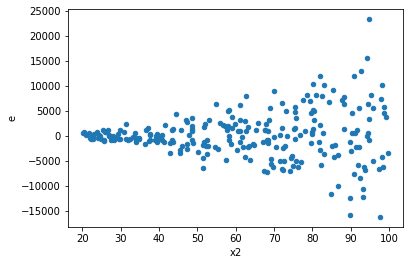

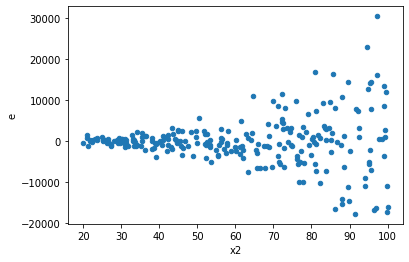

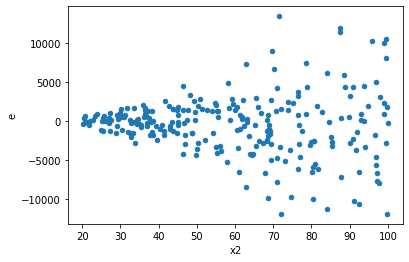

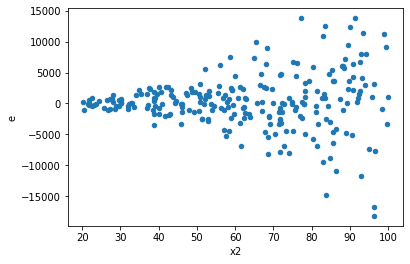

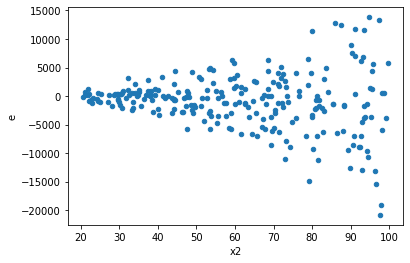

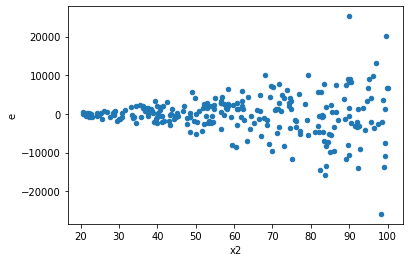

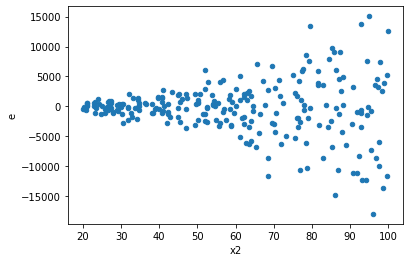

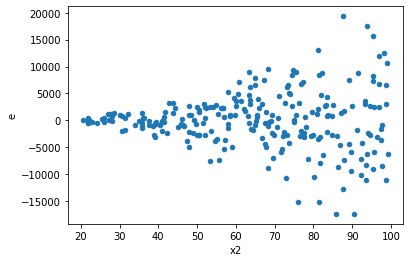

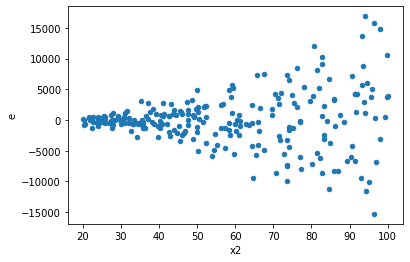

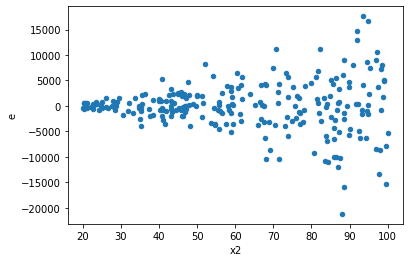

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,97.0,97.0,1042838609.9195616,3798507683.3230023,10750913.504325377,39159873.023948476,3.642469359296159,7.877778429588034e-10,0.9999999996061111,3.938889214794017e-10,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,1262283691.7495763,4455095908.686896,13013233.935562642,45928823.80089584,3.52939354109214,1.8999186668366974e-09,0.9999999990500407,9.499593334183487e-10,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,423766005.7966381,4553887281.230988,4368721.7092436915,46947291.559082344,10.746230747485587,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,131807159.74066527,4853720687.266054,1358836.698357374,50038357.60068097,36.82440845259015,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,1059092022.7430702,4400282284.796149,10918474.461268766,45363734.89480566,4.1547686039588205,1.6934453839212438e-11,0.9999999999915328,8.467226919606219e-12,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,399253284.824545,4484666010.731444,4116013.245613866,46233670.21372623,11.232633972447505,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,2064253464.1508548,2210510756.301463,21280963.547946956,22788770.68352024,1.0708523903147584,0.736719180964061,0.6316404095179695,0.3683595904820305,Reject005=1 : Homoscedasticity
9.0,97.0,97.0,289223426.01473737,3575129695.1610813,2981684.804275643,36857007.166609086,12.361134588658494,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
10.0,97.0,97.0,758600270.0236,3683868085.8403125,7820621.340449484,37978021.503508374,4.856138642984806,1.2878587085651816e-13,0.9999999999999356,6.439293542825908e-14,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,3351782760.9032893,514660371.8449312,34554461.45261123,5305777.029329187,0.15354824836745465,5.6689262817551056e-18,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,1042838609.9195616,3798507683.3230023,10750913.504325377,39159873.023948476,3.642469359296159,7.877778429588034e-10,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,1262283691.7495763,4455095908.686896,13013233.935562642,45928823.80089584,3.52939354109214,1.8999186668366974e-09,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,423766005.7966381,4553887281.230988,4368721.7092436915,46947291.559082344,10.746230747485587,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,131807159.74066527,4853720687.266054,1358836.698357374,50038357.60068097,36.82440845259015,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,1059092022.7430702,4400282284.796149,10918474.461268766,45363734.89480566,4.1547686039588205,1.6934453839212438e-11,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,399253284.824545,4484666010.731444,4116013.245613866,46233670.21372623,11.232633972447505,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,2371537591.33322,1880448662.6757653,24448841.147765156,19386068.687379025,0.7929238269500183,0.25495605694043916,Reject005=1 : Homoscedasticity
8.0,97.0,97.0,2064253464.1508548,2210510756.301463,21280963.547946956,22788770.68352024,1.0708523903147584,0.736719180964061,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    822
Reject005=1 : Homoscedasticity      178
Name: Result_test, dtype: int64